### Step 1: Import Libraries/Dataset (0 mark)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if np.random.random() < 0.005: print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0081-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person1180_virus_2010.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person156_virus_308.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person259_bacteria_1217.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person371_bacteria_1702.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person1180_virus_2013.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person834_bacteria_2747.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person1312_virus_2261.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person1431_bacteria_3698.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person527_virus_1048.jpeg

In [2]:
import pandas as pd
import numpy as np
import cv2

# example of horizontal shift image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix

### 2. Data Visualization and augmentation (1 mark)


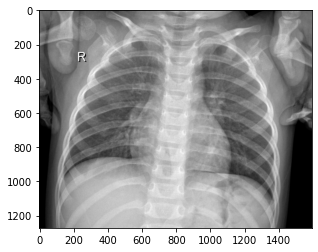

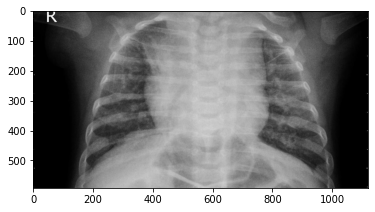

In [3]:
images = ['/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0219-0001.jpeg',
         '/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1242_virus_2109.jpeg']

for imgs in images:
    # load the image
    img = load_img(imgs)

    # convert to numpy array
    data = img_to_array(img)
    
    # expand dimension to one sample
    samples = expand_dims(data, 0)
    image = samples[0].astype('uint8')

    pyplot.imshow(image)
    # show the figure
    pyplot.show()

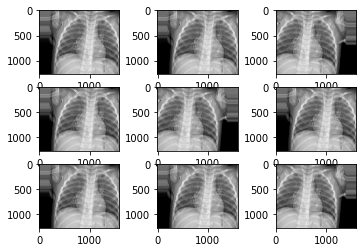

In [4]:
# load the image
img = load_img('/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0219-0001.jpeg')

# convert to numpy array
data = img_to_array(img)

# expand dimension to one sample
samples = expand_dims(data, 0)

# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-200,200])

# prepare iterator
it = datagen.flow(samples, batch_size=1)

# generate samples and plot
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

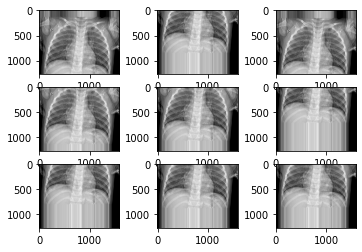

In [5]:
# load the image
img = load_img('/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0219-0001.jpeg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(height_shift_range=0.5)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
    # show the figure
pyplot.show()

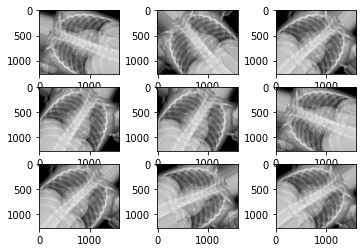

In [6]:
# load the image
img = load_img('/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0219-0001.jpeg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=90)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

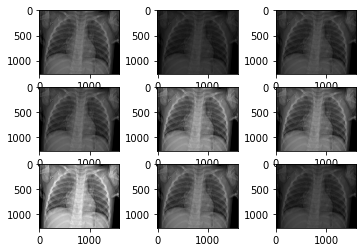

In [7]:
# load the image
img = load_img('/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0219-0001.jpeg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(brightness_range=[0.2,1.0])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

**References:**
1. https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

In [8]:
train_folder= '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/'
test_folder = '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/'

### 3. Model Building (0.2*5 = 1 mark)**

In [9]:
#code from https://www.kaggle.com/rafetcan/pneumonia-normal-cnn-model

import cv2
def picture_separation(folder):
    
    '''divide the mixed pictures into NORMAL and PNEUMONIA & add labels to these'''
    
    X = []
    y = []
    image_list = []

    for foldername in os.listdir(folder):
        if not foldername.startswith('.'):
            if foldername == "NORMAL":
                label = 0
            elif foldername == "PNEUMONIA":
                label = 1
            else:
                label = 2
                
            for image_filename in os.listdir(folder + "/"+ foldername):
                img_file = cv2.imread(folder + "/" + foldername + '/' + image_filename,0)               
                

                if img_file is not None:
                    img = cv2.resize(img_file,(64,64))
                    img_arr = img_to_array(img) / 255
                    X.append(img_arr)
                    y.append(label)
                    image_list.append(foldername + '/' + image_filename)
                                        
    X = np.asarray(X)
    y = np.asarray(y)
    
    return X, y, image_list

In [10]:
#get train dataset
X_train, y_train, img_train = picture_separation(train_folder)

train_df = pd.DataFrame(img_train, columns = ["images"])
train_df["target"] = y_train

#preview
train_df.head()

,images,target
0,PNEUMONIA/person1180_virus_2010.jpeg,1
1,PNEUMONIA/person1230_virus_2081.jpeg,1
2,PNEUMONIA/person1513_virus_2632.jpeg,1
3,PNEUMONIA/person124_virus_238.jpeg,1
4,PNEUMONIA/person746_virus_1369.jpeg,1


In [11]:
#get test dataset
X_test, y_test, img_test = picture_separation(test_folder)

test_df = pd.DataFrame(img_test, columns = ["images"])
test_df["target"] = y_test

#preview
test_df.head()

,images,target
0,PNEUMONIA/person1676_virus_2892.jpeg,1
1,PNEUMONIA/person1650_virus_2852.jpeg,1
2,PNEUMONIA/person22_virus_55.jpeg,1
3,PNEUMONIA/person122_bacteria_582.jpeg,1
4,PNEUMONIA/person85_bacteria_417.jpeg,1


In [12]:
#merge to get full dataset
full_data = pd.concat([train_df, test_df], axis = 0, ignore_index = True)
full_data.info()

X_train = X_train.reshape(5216, 64*64).astype('float32')
X_test = X_test.reshape(624, 64*64).astype('float32')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   images  5840 non-null   object
 1   target  5840 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 91.4+ KB


In [13]:
import keras
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense

#initiate
mlp_model = models.Sequential()

#mulilayers with relu activation
mlp_model.add(Dense(32, activation = 'relu', input_shape = (4096,)))
mlp_model.add(Dense(32, activation = 'relu'))
mlp_model.add(Dense(64, activation = 'relu'))
mlp_model.add(Dense(128, activation = 'relu'))

#one layer with sigmoid activation 
mlp_model.add(Dense(1, activation = 'sigmoid'))

2021-12-24 13:37:33.376363: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-24 13:37:33.476393: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-24 13:37:33.477118: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-24 13:37:33.478712: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [14]:
from keras import optimizers

mlp_model.compile(loss = 'binary_crossentropy',
                  optimizer = 'adam',
                  metrics = ['acc'])
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                131104    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 142,721
Trainable params: 142,721
Non-trainable params: 0
_________________________________________________________________


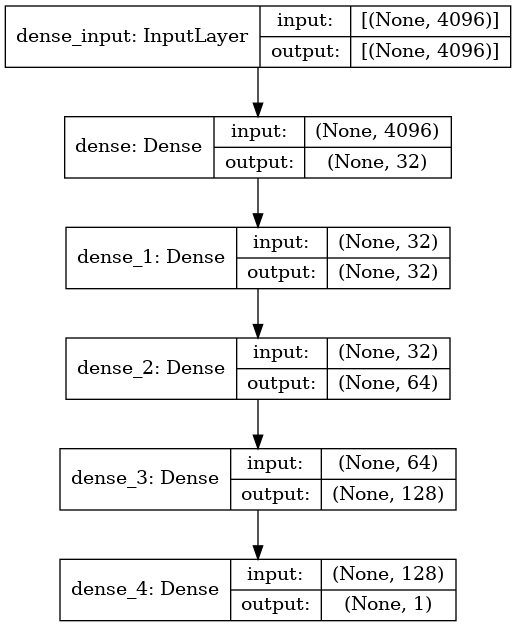

In [15]:
from keras.utils.vis_utils import plot_model

#plot
plot_model(mlp_model, to_file = 'mlp_model_plot.png', show_shapes = True, show_layer_names = True)

In [16]:
mlp_history = mlp_model.fit(X_train, y_train,
                            epochs = 3,
                            batch_size = 32,
                            validation_data = (X_test, y_test),
                            validation_steps = 624 // 32)

2021-12-24 13:37:36.855974: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/3
163/163 [==============================] - 2s 3ms/step - loss: 0.3290 - acc: 0.8547 - val_loss: 0.6014 - val_acc: 0.7747
Epoch 2/3
163/163 [==============================] - 0s 2ms/step - loss: 0.1630 - acc: 0.9383 - val_loss: 0.3639 - val_acc: 0.8470
Epoch 3/3
163/163 [==============================] - 0s 3ms/step - loss: 0.1841 - acc: 0.9316 - val_loss: 0.8446 - val_acc: 0.7171


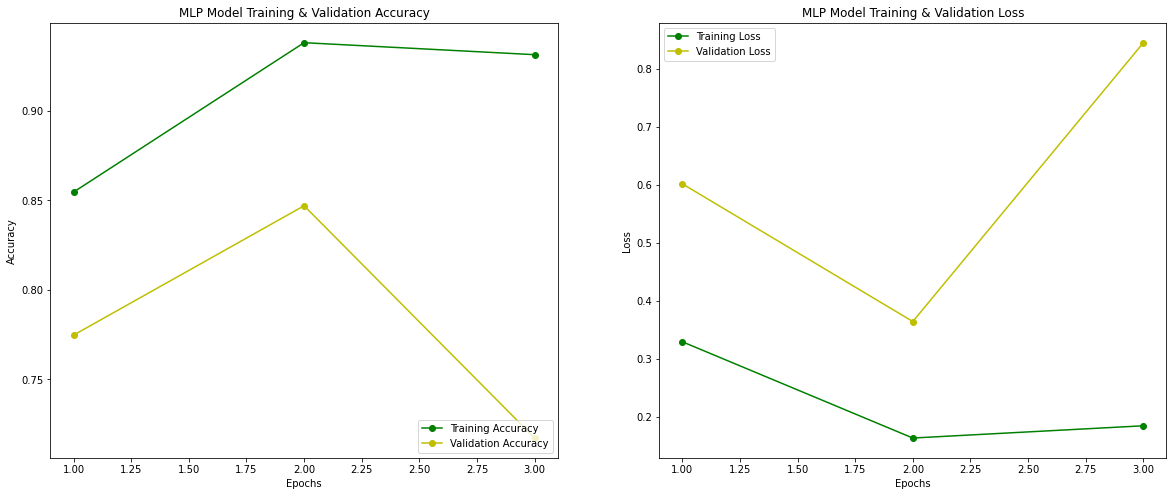

In [17]:
from PIL import Image
import matplotlib.pyplot as plt


fig , ax = plt.subplots(1,2)
fig.set_size_inches(20, 8)

mlp_train_acc = mlp_history.history['acc']
mlp_train_loss = mlp_history.history['loss']
mlp_val_acc = mlp_history.history['val_acc']
mlp_val_loss = mlp_history.history['val_loss']

epochs = range(1, len(mlp_train_acc) + 1)

ax[0].plot(epochs , mlp_train_acc , 'g-o' , label = 'Training Accuracy')
ax[0].plot(epochs , mlp_val_acc , 'y-o' , label = 'Validation Accuracy')
ax[0].set_title('MLP Model Training & Validation Accuracy')
ax[0].legend(loc = 'lower right')
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , mlp_train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , mlp_val_loss , 'y-o' , label = 'Validation Loss')
ax[1].set_title('MLP Model Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")

plt.show()

CONFUSION MATRIX


<Figure size 432x288 with 0 Axes>

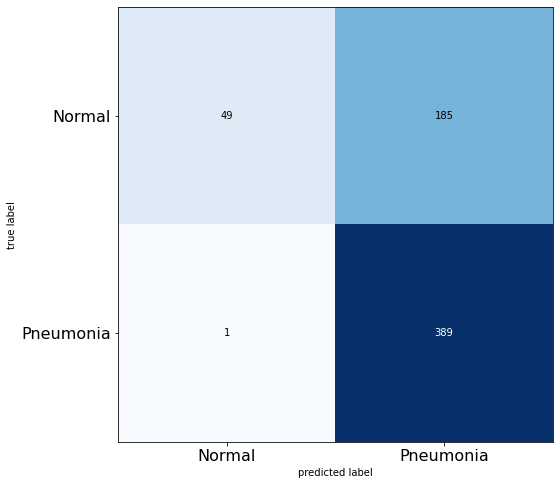


TESTING METRICS
Accuracy: 70.1923076923077%
Precision: 67.77003484320558%
F1-score: 80.70539419087136
Recall: 99.74358974358975%


In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

preds = mlp_model.predict(X_test)

model_acc = accuracy_score(y_test, np.round(preds))*100
cm = confusion_matrix(y_test, np.round(preds))
tn, fp, fn, tp = cm.ravel()

print('CONFUSION MATRIX')
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.show()

print('\nTESTING METRICS')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(model_acc))
print('Precision: {}%'.format(precision))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))
print('Recall: {}%'.format(recall))




## Trying a CNN model

In [19]:
# let's build the CNN model
cnn = Sequential()
#Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))
#Pooling
cnn.add(MaxPooling2D(pool_size = (2, 2)))
# 2nd Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu"))
# 2nd Pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))
# Flatten the layer
cnn.add(Flatten())
# Fully Connected Layers
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))

# Compile the Neural network
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [20]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

1342
normal picture title:  NORMAL2-IM-1167-0001.jpeg
pneumonia picture title: person1263_bacteria_3221.jpeg


Text(0.5, 1.0, 'Pneumonia')

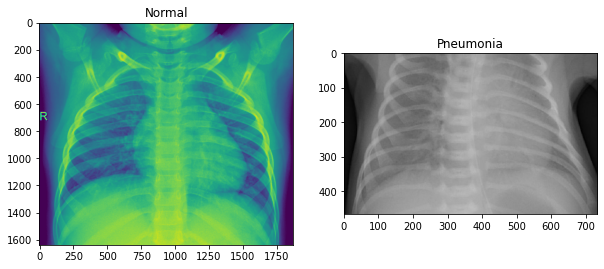

In [21]:
from PIL import Image
import matplotlib.pyplot as plt

#Normal pic 
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)

norm_pic_address = train_n+norm_pic

#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))

sic_pic =  os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)

# Load the images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

#Let's plt these images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')

In [22]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalization.

training_set = train_datagen.flow_from_directory(train_folder,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory(test_folder,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [23]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

In [24]:
cnn_model = cnn.fit_generator(training_set,
                         steps_per_epoch = 163,
                         epochs = 20)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20


2021-12-24 13:37:45.393266: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


163/163 [==============================] - 57s 314ms/step - loss: 0.3849 - accuracy: 0.8246
Epoch 2/20
163/163 [==============================] - 51s 316ms/step - loss: 0.2541 - accuracy: 0.8909
Epoch 3/20
163/163 [==============================] - 51s 314ms/step - loss: 0.2314 - accuracy: 0.9068
Epoch 4/20
163/163 [==============================] - 51s 312ms/step - loss: 0.2048 - accuracy: 0.9193
Epoch 5/20
163/163 [==============================] - 51s 313ms/step - loss: 0.1920 - accuracy: 0.9237
Epoch 6/20
163/163 [==============================] - 51s 315ms/step - loss: 0.1871 - accuracy: 0.9277
Epoch 7/20
163/163 [==============================] - 50s 309ms/step - loss: 0.1691 - accuracy: 0.9356
Epoch 8/20
163/163 [==============================] - 52s 317ms/step - loss: 0.1724 - accuracy: 0.9339
Epoch 9/20
163/163 [==============================] - 51s 312ms/step - loss: 0.1535 - accuracy: 0.9408
Epoch 10/20
163/163 [==============================] - 52s 317ms/step - loss: 0.1633

In [25]:
test_accu = cnn.evaluate_generator(test_set,steps=624)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [26]:
print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 85.89743375778198 %


In [27]:
Y_pred = cnn.predict_generator(test_set, 100)
y_pred = np.argmax(Y_pred, axis=1)
confusion_matrix(test_set.classes, y_pred)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


array([[234,   0],
       [390,   0]])

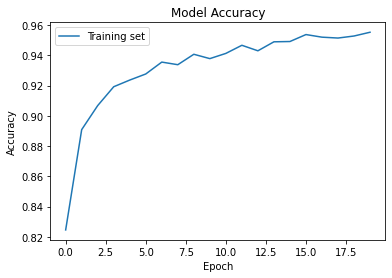

In [28]:
# Accuracy 
plt.plot(cnn_model.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

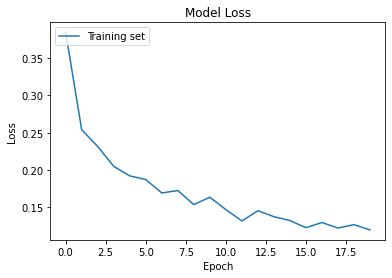

In [29]:
# Loss 

plt.plot(cnn_model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()